<a href="https://colab.research.google.com/github/Mohammad-Hasweh/Brain-MRI-Tumor-Detection/blob/main/arabic_setntiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# installing and importing libraries

In [ ]:
!pip install wordcloud
!pip install pyarabic
!pip install arabic-reshaper
!pip install python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 7.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display

import os
import re ,string
from collections import Counter

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import pyarabic.araby as ar
from nltk.stem.isri import ISRIStemmer

import pickle

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Embedding, Dense, Input, Dropout, Bidirectional

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/330k-arabic-sentiment-reviews/arabic_sentiment_reviews.csv


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# preprocess data + EDA

In [ ]:
data=pd.read_csv('/kaggle/input/330k-arabic-sentiment-reviews/arabic_sentiment_reviews.csv')

In [ ]:
data.head()

,label,content
0,1,النعال المريحة: أرتدي هذه النعال كثيرًا!فهي دا...
1,1,منتج جميل ، خدمة سيئة: لقد اشتريت زوجًا من الن...
2,1,جيد للأشياء الصغيرة: هذا يعمل بشكل جيد لالتقاط...
3,0,واهية للغاية: flimsyif للغاية ، فأنت تشتريه ، ...
4,1,Pop for Girls and Girly Boys ، والأشخاص الذين ...


In [ ]:
data.tail()

,label,content
329995,0,DOA: فتح العلامة التجارية الجديدة من Box.تم تث...
329996,0,شركة صعبة التعامل معها: المنتج كان على ما يرام...
329997,0,SDK Sansa Leather Case: فقير للغاية.لم يتم الإ...
329998,0,حسنًا ، لكن ليس رائعًا: حسنًا ، لقد اشتريت هذا...
329999,1,مريحة جدا!: هذه النعال رائعة!أنها ناعمة جدا وم...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330000 entries, 0 to 329999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   label    330000 non-null  int64 
 1   content  330000 non-null  object
dtypes: int64(1), object(1)
memory usage: 5.0+ MB


In [ ]:
print("num of None data:")
print(data.isna().sum())

print("-"*50)
print("num of Null data:")
print(data.isnull().sum())

print("-"*50)
print("num of duplicated data:")
print(data.duplicated().sum())

num of None data:
label      0
content    0
dtype: int64
--------------------------------------------------
num of Null data:
label      0
content    0
dtype: int64
--------------------------------------------------
num of duplicated data:
32


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
num_positive=len(data[data["label"]==1])
num_negative=len(data[data["label"]==0])

print("number of positive sentece: ",num_positive)
print("number of negative sentece: ",num_negative)

total=num_positive+num_negative
difference=num_positive-num_negative
print("difference=",difference)
print(f"difference percantge= {int(difference/total*100)}%")

number of positive sentece:  166844
number of negative sentece:  163124
difference= 3720
difference percantge= 1%


<ipython-input-15-6fa57e773f40>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='label', palette=[colors[3], colors[8]])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


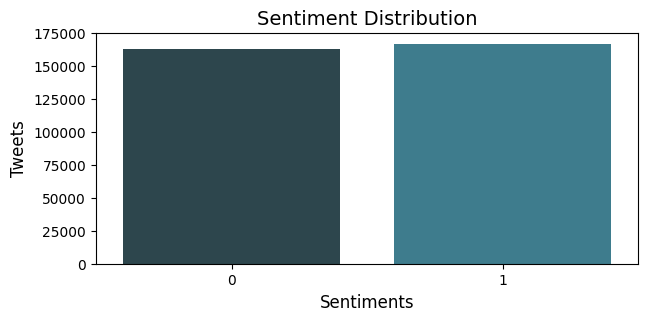

In [ ]:
plt.figure(figsize=(7,3))
colors = sns.dark_palette("#328fa8", n_colors=10, input='rgb')
sns.countplot(data=data, x='label', palette=[colors[3], colors[8]])
plt.xlabel("Sentiments", size=12)
plt.ylabel('Tweets', size=12)
plt.title("Sentiment Distribution", size=14)
plt.show()

In [ ]:
def common_word(data,top=20):
  data = data.apply(lambda x:str(x).split())
  top = Counter([item for sublist in data for item in sublist])
  temp = pd.DataFrame(top.most_common(top))
  temp.columns = ['Common_words','count']
  return temp


In [ ]:
with open('unprocessed_common_word.pkl', 'wb') as file:
    pickle.dump(temp, file)

In [ ]:
temp.head()

,Common_words,count
0,،,990375
1,من,635767
2,في,507736
3,على,360375
4,هذا,355534


In [ ]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

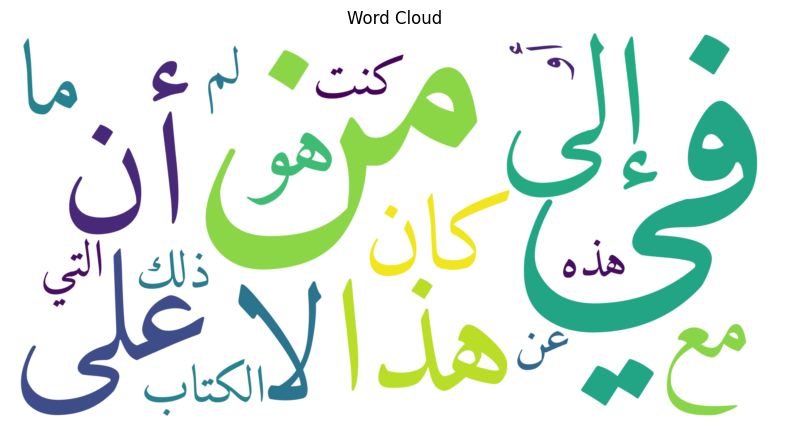

In [ ]:
word2cloud(temp)

In [ ]:
x=data["content"]
y=data["label"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8)

In [ ]:
# Initialize necessary variables

stop_words = set(stopwords.words('arabic'))
punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation
st = ISRIStemmer()

In [ ]:
def remove_urls(text):
    return re.sub(r"http\S+", "", text)

In [ ]:
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text).strip()

In [ ]:
def remove_numbers(text):
    return re.sub("\d+", " ", text)

In [ ]:
def remove_special_characters(text):
    text = text.replace("#", " ")
    text = text.replace("@", " ")
    text = text.replace("_", " ")
    return text

In [ ]:
def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations)
    return text.translate(translator)

In [ ]:
def remove_english(text):
    return re.sub('[A-Za-z0-9]', ' ', text)

In [ ]:
def stem_text(text):
    return " ".join([st.stem(i) for i in text.split()])

In [ ]:
def normalize_arabic(text):
    arabic_normalization_map = {
        "إ": "ا", "أ": "ا", "آ": "ا", "ى": "ي", "ؤ": "ء", "ئ": "ء", "ة": "ه", "گ": "ك"
    }
    return text.translate(str.maketrans(arabic_normalization_map))

In [ ]:
def remove_stop_words(text):
    return ' '.join(word for word in text.split() if word not in stop_words)

In [ ]:
def clean_text(text, normalize=True, stem=True):

    if not isinstance(text, str):
        return ""

    text = remove_urls(text)
    text = remove_extra_spaces(text)
    text = remove_numbers(text)
    text = ar.strip_tashkeel(text)
    text = ar.strip_tatweel(text)
    text = remove_special_characters(text)
    text = remove_punctuations(text)
    text = remove_english(text)
    text = remove_stop_words(text)

    if normalize:
        text = normalize_arabic(text)
    if stem:
        text = stem_text(text)

    return text


In [ ]:
clean_test=pd.DataFrame(x_train.head())
clean_test['cleaned'] = clean_test['content'].apply(lambda x: clean_text(x, normalize=False, stem=False))

In [ ]:
print(clean_test['content'].iloc[2])
print("-"*50)
print(clean_test["cleaned"].iloc[2])

زعماء كايزر: فكاهة نيس: حصلت على قرص "عمل" كايزر تشيفز "التوظيف" في نفس الوقت الذي يزدهر فيه القتلة "فوس الساخنة".من الأفضل على "أتنبأ بأعمال شغب" و "التقاليد الممتازة للوقت" و "المولود ليكون راقصة."-هه "كارولين ، نعم" ، على الرغم من أني غنائية وحزينة (وأشارك وأحيانًا أستمتع بهذه الصفات ، لأنني إنسان) ، لا يبدو أنه يعكس الجدية المطلوبة لتناسب تلك الصفات الغنائية ...صاب؟أنا مجرد قديم ...
--------------------------------------------------
زعماء كايزر فكاهة نيس حصلت قرص عمل كايزر تشيفز التوظيف الوقت يزدهر القتلة فوس الساخنةمن الأفضل أتنبأ بأعمال شغب التقاليد الممتازة للوقت المولود ليكون راقصةهه كارولين الرغم أني غنائية وحزينة وأشارك وأحيانا أستمتع بهذه الصفات لأنني إنسان يبدو أنه يعكس الجدية المطلوبة لتناسب الصفات الغنائية صابأنا مجرد قديم


In [ ]:
clean_train_vi=data['content'].apply(lambda x: clean_text(x, normalize=False, stem=True))
common_train=common_word(clean_train_vi)

In [ ]:
with open('no_stem_norm_common_word.pkl', 'wb') as file:
    pickle.dump(common_train, file)

In [ ]:
fig = px.bar(common_train, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
def word2cloud(word_freq):
  word_freq=' '.join(word_freq["Common_words"].to_numpy())
  reshaped_text = arabic_reshaper.reshape(word_freq)
  reshaped_text=reshaped_text[::-1]
  bidi_text = get_display(reshaped_text)

  wordcloud = WordCloud(font_path='/content/Amiri-Regular.ttf',  # Correct font path
                      background_color='white',
                      mode='RGB',
                      width=2000, height=1000).generate(bidi_text)

  plt.figure(figsize=(10, 5))
  plt.title("Word Cloud")
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()



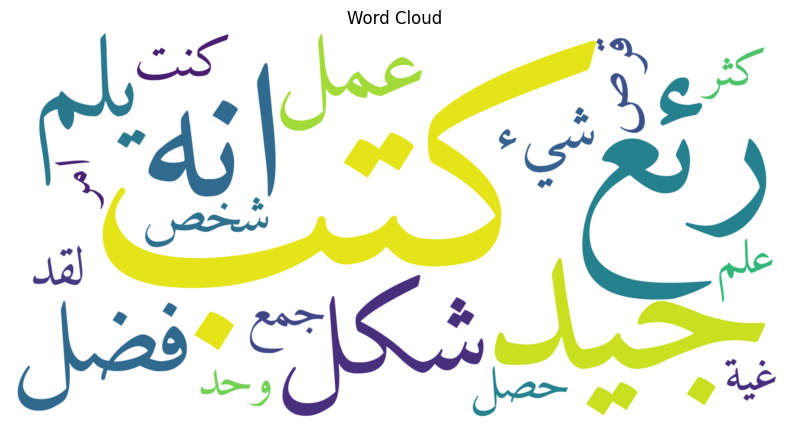

In [ ]:
word2cloud(common_train)

In [ ]:
x_train_model=x_train.apply(clean_text)
x_test_model=x_test.apply(clean_text)

In [ ]:
with open('processed_train_data.pkl', 'wb') as file:
    pickle.dump(temp, file)
with open('processed_test_data.pkl', 'wb') as file:
    pickle.dump(temp, file)

In [ ]:
x_train_model.head()

,content
75639,صخر شكسبير احب صدر روميو وجولييتاسمي وجه شكسبي...
70291,نسب ضغط خاص عقد ضغط بلغ عمر عما خفض معه بدل ثا...
228249,زعماء كايزر فكه نيس حصل قرص عمل كايزر شيفز وظف...
150950,كتب عظيميعلم جزء حيي لغز حيه علم انثروبولوج عل...
287917,لقد وقف فتر وجز شهد جنس اول فقط ترق طلقل اضع وقت


# model training

In [ ]:
padding_type='post'
oov_tok = "<OOV>"
max_length = max(len(data) for data in x_train_model)
print(max_length)
vocab_size=25000

586


In [ ]:
print(max_length)

586


In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(x_train_model)

In [ ]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
x_train_seq = tokenizer.texts_to_sequences(x_train_model)
x_test_seq = tokenizer.texts_to_sequences(x_test_model)

x_train_padded = pad_sequences(x_train_seq, maxlen=max_length, padding='post')
x_test_padded = pad_sequences(x_test_seq, maxlen=max_length, padding='post')


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(Bidirectional(GRU(units = 32)))
model.add(Dense(32, activation = 'tanh'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train_padded, y_train, epochs = 10,  validation_data=(x_test_padded, y_test),  batch_size= 128, shuffle = True)

Epoch 1/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 90s 40ms/step - accuracy: 0.8040 - loss: 0.4164 - val_accuracy: 0.8570 - val_loss: 0.3303
Epoch 2/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.8739 - loss: 0.3022 - val_accuracy: 0.8623 - val_loss: 0.3204
Epoch 3/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 143s 40ms/step - accuracy: 0.8881 - loss: 0.2687 - val_accuracy: 0.8674 - val_loss: 0.3108
Epoch 4/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 141s 40ms/step - accuracy: 0.9035 - loss: 0.2389 - val_accuracy: 0.8676 - val_loss: 0.3228
Epoch 5/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.9152 - loss: 0.2130 - val_accuracy: 0.8644 - val_loss: 0.3274
Epoch 6/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 142s 40ms/step - accuracy: 0.9279 - loss: 0.1864 - val_accuracy: 0.8605 - val_loss: 0.3636
Epoch 7/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 143s 40ms/step - accuracy: 0.9372 - loss: 0.1644 - val_accuracy: 0.8583 - val_loss: 0.3976
Epoch 8/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 142s 40ms/step - accuracy: 0.9

In [ ]:
model.save('model.h5')

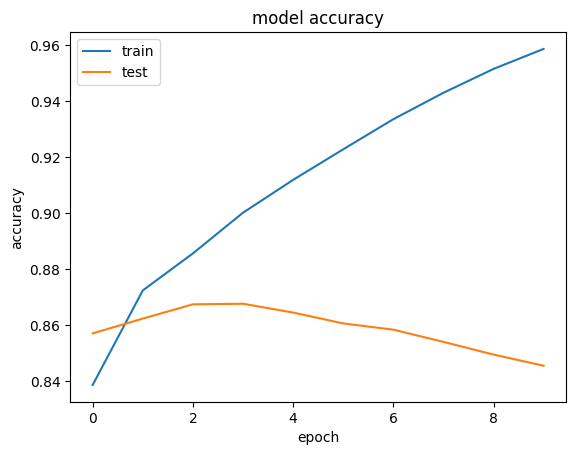

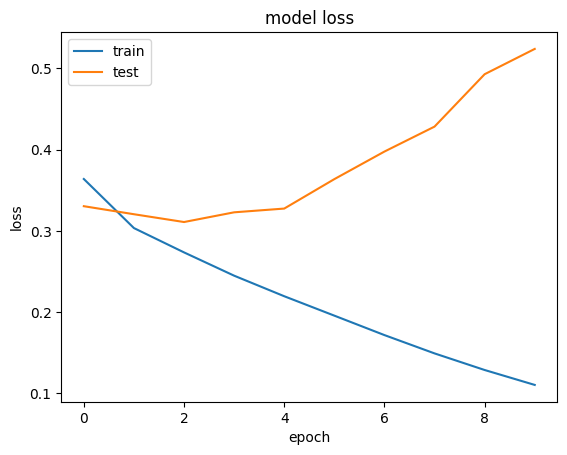

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
x_train_model = tfidf_vectorizer.fit_transform(x_train_model)



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB()
}

# Dictionary to store model performance
model_performance = {}

for model_name, model in models.items():
    model.fit(x_train_model, y_train)

    y_train_pred = model.predict(x_train_model)

    training_accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Store performance metrics in the dictionary
    model_performance[model_name] = {
        "Training Accuracy": training_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    print(f"Model: {model_name}")
    print(f"Training Accuracy: {training_accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("--" * 20)

    with open(f'{model_name}.pkl', 'wb') as file:
      pickle.dump(model, file)

Model: Logistic Regression
Training Accuracy: 0.8654034109419867
Precision: 0.8654293135440764
Recall: 0.8654034109419867
F1 Score: 0.8653912396298707
----------------------------------------
Model: Naive Bayes
Training Accuracy: 0.8878147090243736
Precision: 0.8879303538684482
Recall: 0.8878147090243736
F1 Score: 0.8878178313965779
----------------------------------------


In [ ]:
# Convert model performance dictionary to DataFrame
df_performance = pd.DataFrame(model_performance).T
df_performance.reset_index(inplace=True)
df_performance.rename(columns={'index': 'Model'}, inplace=True)
df_performance.style.background_gradient(cmap='Purples')

,Model,Training Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.865403,0.865429,0.865403,0.865391
1,Naive Bayes,0.887815,0.887930,0.887815,0.887818
